In [1]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# =============================================================================================

In [2]:
# ============================== data preprocessing ===========================================
# loading the dataset
data = pd.read_csv('data.csv')

In [3]:
# rows * columns
data.shape

(569, 33)

In [4]:
# column labels
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# data of top 5 rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# unique values of the column which is to be predicted by the classifier
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
# total number of null values in every column
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# dropping the null values
data.dropna(axis=1, inplace=True)

In [9]:
# Malignant = 0 
# Benign = 1
data['diagnosis'] = data.diagnosis.map(lambda x: 0 if x == 'M' else 1)

In [10]:
data['diagnosis'].unique()

array([0, 1])

In [11]:
# convert the dataset into numpy's ndarray (X and y)
y = data['diagnosis'].values
data.drop(['diagnosis', 'id'], inplace=True, axis=1)
X = data.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
# split the data set into train and test
X1, X_test, y1, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# split the train data set into cross validation train and cross validation test
X_train, X_cv, y_train, y_cv = train_test_split(X1, y1, test_size=0.2)
# =============================================================================================

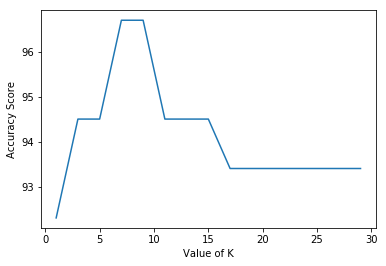

In [14]:
# ====================== Finding the optimal value of K for K-NN ===============================
# list to store accuracy_score
accuracy = []
for i in range(1,30,2):
    # instantiate the K-NN classifier with k = i
    clf = KNeighborsClassifier(n_neighbors=i)
    # fitting the model with training data
    clf.fit(X_train, y_train)
    # append the accuracy_score of cross_validation data into accuracy list
    accuracy.append(accuracy_score(y_cv, clf.predict(X_cv)) * float(100))

# plot the accuracy and the value of K to findout optimal value for K
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score')
k = [i for i in range(1,30,2)]
plt.plot(k,accuracy)
# =============================================================================================

In [16]:
# ====================== Fitting the model with optimal value of K ============================
# since, k=9 has highest accuracy
# therefore, train the K-NN model using k=9
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)) * float(100))
# =============================================================================================

96.49122807017544
